In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.8.0


(<matplotlib.collections.PathCollection at 0x7f0ee0138b90>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

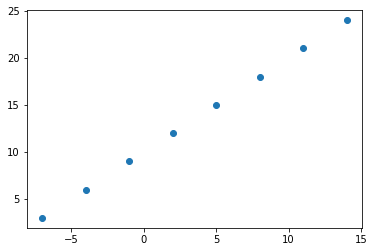

In [2]:
x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0], dtype=tf.float64)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0], dtype=tf.float64)

plt.scatter(x, y), x, y

In [3]:
# Real Relationship
# y = x + 10

In [4]:
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

In [5]:
# Create a Regression Neural Network 
# Set a rendom seed for Result reproducable
tf.random.set_seed(42)

# 1. Create a model using the sequential API 
model = tf.keras.Sequential([
                    tf.keras.layers.Dense(1)
                    ])

# 2. Compile The model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 10.9748 - mae: 10.9748


In [6]:
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

In [7]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

In [8]:
from tensorflow.python.eager.monitoring import Metric
# Creating Again

model = tf.keras.Sequential([
                  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 349ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] -

In [9]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [10]:
# Make Better

model = tf.keras.Sequential([
                  tf.keras.layers.Dense(1000, activation='relu'),
                  tf.keras.layers.Dense(100, activation='relu'),
                  tf.keras.layers.Dense(100, activation='relu'),
                  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.4907 - mae: 13.4907
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 13.2385 - mae: 13.2385
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 12.9907 - mae: 12.9907
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 12.7622 - mae: 12.7622
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5210 - mae: 12.5210
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 12.2441 - mae: 12.2441
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 11.9428 - mae: 11.9428
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 11.5775 - mae: 11.5775
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 11.1253 - mae: 11.1253
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 10.5147 - mae: 10.5147
Epoch 11/100
1/1 [==============================] -

In [11]:
# Creating another one

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, decay=0.002),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.5071 - mae: 12.5071
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 11.8292 - mae: 11.8292
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 11.1466 - mae: 11.1466
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.4568 - mae: 10.4568
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 9.7567 - mae: 9.7567
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0433 - mae: 9.0433
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 8.3135 - mae: 8.3135
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 7.5644 - mae: 7.5644
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 6.7934 - mae: 6.7934
Epoch 11/100
1/1 [==============================] - 0s 18ms/s

In [12]:
model.predict([40.0])

array([[49.889637]], dtype=float32)

In [13]:
# Make a bigger Data Set

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [14]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [15]:
X = tf.expand_dims(X, axis=-1)
X

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56],
       [  60],
       [  64],
       [  68],
       [  72],
       [  76],
       [  80],
       [  84],
       [  88],
       [  92],
       [  96]], dtype=int32)>

In [16]:
# Create a neural network

model = tf.keras.Sequential([
              tf.keras.layers.Dense(100, activation=None),
              tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(X, y, epochs=5)

# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
2/2 [==============================] - 1s 13ms/step - loss: 43.1089 - mae: 43.1089
Epoch 2/5
2/2 [==============================] - 0s 10ms/step - loss: 28.2287 - mae: 28.2287
Epoch 3/5
2/2 [==============================] - 0s 14ms/step - loss: 48.1164 - mae: 48.1164
Epoch 4/5
2/2 [==============================] - 0s 10ms/step - loss: 10.5299 - mae: 10.5299
Epoch 5/5
2/2 [==============================] - 0s 10ms/step - loss: 23.6934 - mae: 23.6934


In [17]:
model.predict([17])

array([[6.584521]], dtype=float32)

In [18]:
# Visualized a Data

In [19]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(TensorShape([40, 1]),
 TensorShape([10, 1]),
 TensorShape([40]),
 TensorShape([10]))

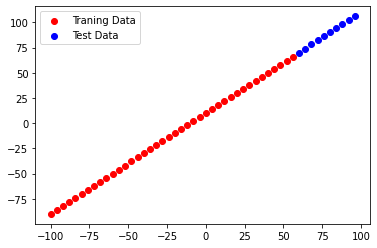

In [21]:
plt.scatter(X_train, y_train, c='red', label='Traning Data')
plt.scatter(X_test, y_test, c='blue', label='Test Data')
plt.legend();

In [22]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# model.fit(X, Y, epochs=50)

In [23]:
model.summary()

ValueError: ignored

In [24]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                  tf.keras.layers.Dense(100, input_shape=[1]),
                  tf.keras.layers.Dense(10, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics=['mae'])

In [25]:
# input has one i.e. x is single thus 100 percepton takes x thus w=100, b=100 thus param = 200 on first layer
# In second layer 100 input goes to all 10 perceptron thus each perceptron has w=100 and b=1 there are total 10 perceptron
# thus w=1000 b=10 thus in second layer param=1010, now the whole model hase total params=1210 i.e w=1100 and b=110.
# All are need to train thus it is in trainable params.
# Non Trainable params when we use someone else already trained model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               200       
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


In [26]:
# model.fit(X_train, y_train, epochs=100, verbose=1)

In [27]:
# Visualize our model

In [28]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                  tf.keras.layers.Dense(20, input_shape=[1], name='Hidden_1'),
                  tf.keras.layers.Dense(10, input_shape=[1], name='Hidden_2'),
                  tf.keras.layers.Dense(1, input_shape=[1], name='Output')
], name='Checking_my_plot_model')

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model.fit(X_train, y_train, epochs=200, verbose=0)

In [29]:
model.summary()

Model: "Checking_my_plot_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 20)                40        
                                                                 
 Hidden_2 (Dense)            (None, 10)                210       
                                                                 
 Output (Dense)              (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


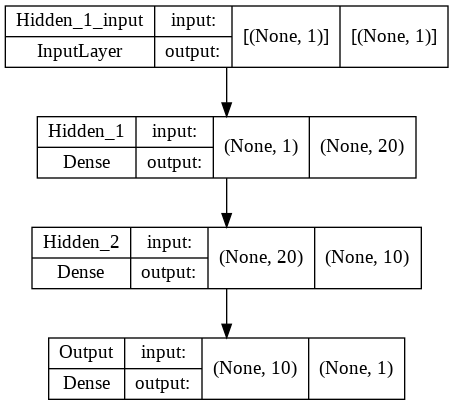

In [30]:

# Plot Model
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

Visualize Our model's Prediction

In [31]:
# Make some prediction
y_pred = model.predict(X_test)
y_pred = tf.constant(y_pred)
y_pred, y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 67.892456],
        [ 71.78572 ],
        [ 75.678986],
        [ 79.57225 ],
        [ 83.465515],
        [ 87.35878 ],
        [ 91.25203 ],
        [ 95.1453  ],
        [ 99.03857 ],
        [102.931816]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [32]:
#  Create a ploting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Ploting Traning data, test data and compare predictions to ground truth labels.
  """

  plt.figure(figsize=(10, 8))
  # Plot Traning data into blue
  plt.scatter(train_data, train_labels, c='blue', label='Traning Data')
  # Plot Testing data into green
  plt.scatter(test_data, test_labels, c='green', label='Testing Data')
  # Plot Models's predictions in red
  plt.scatter(test_data, predictions, c='red', label='Prediction')
  plt.legend();

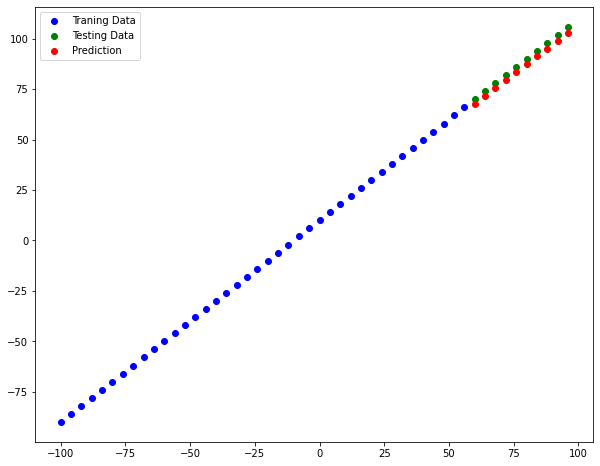

In [33]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

# Regression Evaluation Metrics

In [34]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 152ms/step - loss: 2.5879 - mae: 2.5879


[2.587857723236084, 2.587857723236084]

In [35]:
tf.keras.losses.MAE(y_test, y_pred)
# Right now it is wrong because y_test and y_pred is in different dimension

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.107544, 16.571423, 13.792608, 11.7711  , 10.506897, 10.      ,
       10.250406, 11.258121, 13.02314 , 15.545453], dtype=float32)>

In [36]:
# tf.keras.losses.mean_absolute_error(y_test, y_pred)

In [37]:
# tf.metrics.mean_absolute_error(y_test, y_pred)

In [38]:
# tf.metrics.MAE(y_test, y_pred)

In [39]:
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 67.892456],
        [ 71.78572 ],
        [ 75.678986],
        [ 79.57225 ],
        [ 83.465515],
        [ 87.35878 ],
        [ 91.25203 ],
        [ 95.1453  ],
        [ 99.03857 ],
        [102.931816]], dtype=float32)>)

In [40]:
y_pred = tf.squeeze(y_pred)
y_pred, y_test

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 67.892456,  71.78572 ,  75.678986,  79.57225 ,  83.465515,
         87.35878 ,  91.25203 ,  95.1453  ,  99.03857 , 102.931816],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [41]:
tf.metrics.MAE(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=2.5878577>

# Experiment for improve our model

In [42]:
# By Try different model hyperparameter

# Saving a model

In [43]:
model.save('as_default_type')

INFO:tensorflow:Assets written to: as_default_type/assets


INFO:tensorflow:Assets written to: as_default_type/assets


In [44]:
model.save('model_HDF5_format.h5')

# Loading a Model

In [45]:
as_default_type = tf.keras.models.load_model('as_default_type')
as_default_type.summary()

Model: "Checking_my_plot_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 20)                40        
                                                                 
 Hidden_2 (Dense)            (None, 10)                210       
                                                                 
 Output (Dense)              (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.summary()

Model: "Checking_my_plot_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 20)                40        
                                                                 
 Hidden_2 (Dense)            (None, 10)                210       
                                                                 
 Output (Dense)              (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [47]:
model_HDF5_format = tf.keras.models.load_model('model_HDF5_format.h5')
model_HDF5_format.summary()

Model: "Checking_my_plot_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 20)                40        
                                                                 
 Hidden_2 (Dense)            (None, 10)                210       
                                                                 
 Output (Dense)              (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_pred = model.predict(X_test)
as_default_type_pred = as_default_type.predict(X_test)
model_HDF5_format_pred = model_HDF5_format.predict(X_test)
model_pred == as_default_type_pred, model_pred == model_HDF5_format_pred

(array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]), array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]))

In [49]:
# Downloading a file from google colab
# from google.colab import files
# files.download('/content/model_HDF5_format.h5')

In [50]:
# Save a file from google colab to google drive
# !cp from/file/present/path to/drive/path

# A Large Example

In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [57]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
# For onehot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [75]:
# Create X and Y values (features and label)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [79]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Build a neural Network

# I don't know which seed to impliment tenser or numpy
# tf.random.set_seed(42)
# np.random.seed(42)

model = tf.keras.Sequential([
                tf.keras.layers.Dense(20),
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mse'])

history = model.fit(X_train, y_train, epochs=60)

Epoch 1/60
34/34 [==============================] - 1s 7ms/step - loss: 12816.3330 - mse: 307646176.0000
Epoch 2/60
34/34 [==============================] - 0s 7ms/step - loss: 8797.4238 - mse: 194962624.0000
Epoch 3/60
34/34 [==============================] - 0s 7ms/step - loss: 7482.1543 - mse: 154182368.0000
Epoch 4/60
34/34 [==============================] - 0s 7ms/step - loss: 7303.7705 - mse: 154232736.0000
Epoch 5/60
34/34 [==============================] - 0s 7ms/step - loss: 7205.8774 - mse: 151217936.0000
Epoch 6/60
34/34 [==============================] - 0s 7ms/step - loss: 7092.2412 - mse: 154556512.0000
Epoch 7/60
34/34 [==============================] - 0s 7ms/step - loss: 6970.3857 - mse: 154610032.0000
Epoch 8/60
34/34 [==============================] - 0s 6ms/step - loss: 6819.3428 - mse: 154829504.0000
Epoch 9/60
34/34 [==============================] - 0s 7ms/step - loss: 6648.7095 - mse: 155460928.0000
Epoch 10/60
34/34 [==============================] - 0s 8ms/ste

In [145]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3275.4097 - mse: 36963192.0000


[3275.40966796875, 36963192.0]

In [146]:
# model.predict(X_test)

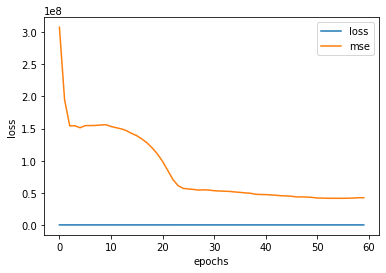

In [147]:
# Plot histroy (Also known as loss curve or traning curve)
# Check Early Stop callback in tenserflow

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs');

# Preprocessing data (Normalization and standardization)

In [148]:
# Feature Scaling
# Scale or Normalisation --> convert into 0 to 1 --> minmaxscaler --> use as default scaler in NN
# Standardization --> Removes the mean and divides each value by std --> StandardScaler --> Transform a feature to have close to normal distribution(this reduce
# the effect of outliers)


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [163]:
# Don't forget that testing data points represent real-world data.
# Feature normalization (or data standardization) of the explanatory (or predictor) variables is a technique used to center
# and normalise the data by subtracting the mean and dividing by the variance. If you take the mean
# and variance of the whole dataset you'll be introducing future information into the training explanatory variables (i.e. the mean and variance).

# Therefore, you should perform feature normalisation over the training data.
# Then perform normalisation on testing instances as well, but this time using the mean
# and variance of training explanatory variables. In this way, we can test 
# and evaluate whether our model can generalize well to new, unseen data points
# https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data
# https://towardsdatascience.com/feature-scaling-and-normalisation-in-a-nutshell-5319af86f89b
# https://devskrol.com/2022/01/30/5-most-important-data-pre-processing-techniques-feature-scaling-part-iv/

In [164]:
from sklearn.compose import make_column_transformer # https://stackoverflow.com/questions/65183489/what-is-the-difference-between-columntransformer-and-make-columntransformer#:~:text=There%20is%20no%20such%20major,a%20tuple%20without%20a%20name.
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the columan transfemer
# I didn't understand is it not wised toward traning set why we only pass X_train not X_test
ct.fit(X_train)

# Perform transformation
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [165]:
X_train_normal[0], X_train_normal.shape

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]), (1070, 11))

In [169]:
X_test_normal[0], X_test_normal.shape

(array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]), (268, 11))

In [168]:
# pd.DataFrame(X_test_normal)

In [180]:
# Create a neural network model
tf.random.set_seed(42)

model = tf.keras.Sequential([
                tf.keras.layers.Dense(20),
                tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mse'])

History = model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 6ms/step - loss: 13345.5420 - mse: 322436352.0000
Epoch 2/200
34/34 [==============================] - 0s 7ms/step - loss: 13344.4180 - mse: 322406080.0000
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 13343.0654 - mse: 322369344.0000
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 13341.2930 - mse: 322321440.0000
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 13338.9922 - mse: 322259424.0000
Epoch 6/200
34/34 [==============================] - 0s 6ms/step - loss: 13336.1191 - mse: 322181248.0000
Epoch 7/200
34/34 [==============================] - 0s 7ms/step - loss: 13332.6582 - mse: 322087456.0000
Epoch 8/200
34/34 [==============================] - 0s 7ms/step - loss: 13328.6084 - mse: 321978016.0000
Epoch 9/200
34/34 [==============================] - 0s 8ms/step - loss: 13323.9697 - mse: 321851648.0000
Epoch 10/200
34/34 [==========================